# Topic 5 DQ 1

Explain the difference between correlation and causation. Why is it important to understand the distinction between the two when interpreting statistical results? Provide at least two examples of a correlation that does not necessarily imply causation. How can hypothesis testing be used to determine whether a correlation is statistically significant and can be used to make causal inferences?

Correlation and causation are two common topics in data analysis. Correlation is when two items have relation to another in trend. For example, when looking at data we may see that an increase in time a company has been open equates to an increase in sales. Causation is the explanation for one variable trending in a direction due to another variable. So while we may be able to visualize a positive correlation with business history and sales, it may not be the long standing term of the business causing people to shop there more. Afterall, in many cases business fail after some time. Instead, the cause of increased sales could be increase in business exposure due to social media advertising and word of mouth. 

### Example 1

In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats

In [2]:
# read video game data
data = pd.read_csv('vgsales.csv')

In [3]:
#read to dataframe and print head
df1 = pd.DataFrame(data)
df1.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
#print info of video game dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
#since we will be merging our dataframe on year lets drop null values here 
df1.dropna(inplace=True) #drop null values

In [6]:
#format year to datetime
df1['Year']= pd.to_datetime(df1['Year'], format='%Y')
df1['Year'] = pd.DatetimeIndex(df1['Year']).year
df1.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
#we want to compare action games vs north american sale data for years before 2010
df1= df1.loc[df1['Year']<2010]
df1['Year'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2004,
       1990, 1988, 2002, 2001, 1998, 1992, 1997, 1993, 1994, 1982, 2003,
       1986, 2000, 1995, 1991, 1981, 1987, 1980, 1983], dtype=int64)

In [10]:
#calculate sum of global sales each year
NA_sales = df1.groupby(by=['Year'])['NA_Sales'].sum()

In [11]:
#calculate action games each year
action = df1.loc[df1['Genre']=='Action']
action_games = action.groupby(by='Year')['Genre'].count()

<AxesSubplot:title={'center':'Action Games'}, xlabel='Year', ylabel='Genre'>

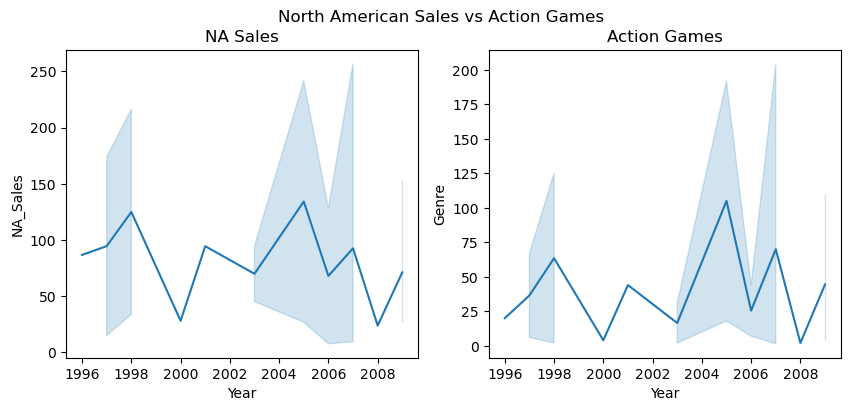

In [12]:
#plot  north american sales vs action games
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
figure.suptitle('North American Sales vs Action Games')
axes[0].set_title('NA Sales')
axes[1].set_title('Action Games')

sns.lineplot(ax=axes[0], data=df1, x='Year', y=NA_sales)
sns.lineplot(ax=axes[1], data=df1, x='Year', y=action_games)

In [13]:
#calculate pearsonr
stats.pearsonr(NA_sales,action_games)

(0.9697730836761629, 1.0820383151095472e-18)

The pearson R function in scipy stats gives us the correlation coefficient which returns a value between -1 and 1. This can tell us if something is positive or negatively correlated the closer it is to one on either side. The second calculation that pearson r gives us is a p-value. This measure helps determine the possibility of uncorrelated data giving the same correlation coeeficient. 

The calculation here shows that our data is correlated with a very low p-value. 

In [14]:
#Calculate linear regression and print R-Squared value
lreg = stats.linregress(action_games, NA_sales)
print(f"R-squared: {lreg.rvalue**2:.6f}")

R-squared: 0.940460


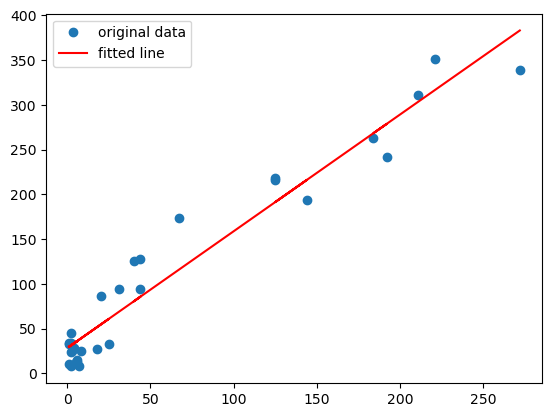

In [15]:
# plot data verus linear regression 
plt.plot(action_games, NA_sales, 'o', label='original data')
plt.plot(action_games, lreg.intercept + lreg.slope*action_games, 'r', label='fitted line')
plt.legend()
plt.show()

We can also run linear regression on our data, to determine how well one variable predicts another. We can than use matplotlib to visualize these calculations. 

Analyzing Action Games Sold in North America we can see a high correlation between the two. Analyzing with scipy stats we can confirm this correlation. While it might be true that action games are responsible for the majority of sales in this timeframe, we cannot say that action games being made are the key indicator for global sale data. By further visualizing the data we can better understand why this trend is just how we parsed the data and chose to analyze it. 

<AxesSubplot:xlabel='Genre', ylabel='NA_Sales'>

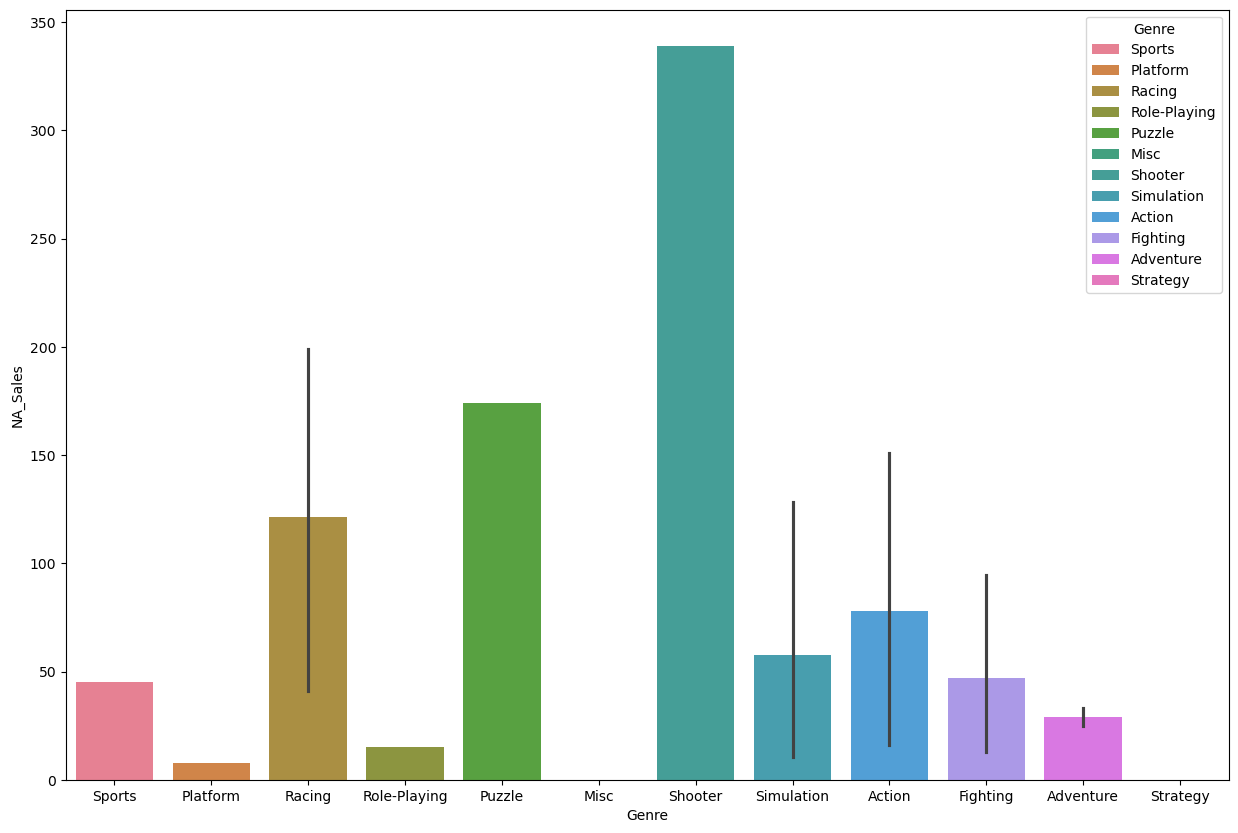

In [16]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df1,x='Genre',y=NA_sales, hue='Genre')

We can see that the total time frame we visualized, shooter games have the highest sales for north america, followed by puzzle games. So while, action games and north american game sales are highly correlcated one does not cause the other. Sale fluctuations are likely to be the result of the economy and quantity of new games released. 

### Example 2

For our second example we will look at home prices in two states quiet a distance from each other - Texas and Hawaii. Home pricing historically in america follows a trend in fluctation across the states. This is a good way to show correlation vs causation. While pricing may be highly correlated it is not due to the states themselves but an overall reflection of american economy and policy.

In [17]:
#read zillow home data
data2 = pd.read_csv('ZHVI.csv')

In [18]:
# read to pandas data frame and print head of df2
df2 = pd.DataFrame(data2)
df2.head()

,Unnamed: 0,California,Virginia,Florida,New York,New Jersey,Texas,Utah,Washington,Illinois,...,Louisiana,Alabama,Indiana,Nebraska,Oklahoma,New Mexico,South Dakota,Kentucky,Ohio,Iowa
0,2000-01-01,186612.390138,120694.373274,105138.701013,150398.807044,166156.347978,109744.526295,165100.486224,170593.895746,123142.824900,...,100049.891766,96172.771688,96033.740937,112043.157232,79207.964740,NaN,105358.638789,81056.107382,101855.641357,87875.936284
1,2000-02-01,187239.650081,121006.685912,105366.441226,150934.374535,166604.247187,109804.164306,165190.942013,170978.694032,123241.512418,...,100242.878969,96340.243098,95901.696760,112222.262850,79240.638226,NaN,105134.786489,81097.956252,101917.884394,88043.863072
2,2000-03-01,188086.604603,121337.810621,105642.507761,151449.944614,167031.621940,109833.089675,165332.957393,171371.222543,123454.829915,...,100392.846246,96452.452201,95753.389954,112388.260817,79392.939815,NaN,104821.521758,81174.098559,102012.279258,88202.393000
3,2000-04-01,189925.090333,121963.526195,106203.680020,152558.795698,167978.484352,109976.648848,165689.276442,172163.445428,123956.656512,...,100730.939046,96703.834190,95302.553293,112645.940032,79670.273022,NaN,104399.274499,81363.319157,102289.851911,88544.813306
4,2000-05-01,192062.053043,122567.586044,106808.843828,153706.060190,168943.736134,110069.620020,166980.594144,173028.106895,124552.089456,...,101089.144931,96984.209952,95084.718790,112776.611606,80042.774649,NaN,104223.607300,81614.798582,102713.081183,88923.134870


In [19]:
#rename year column
df2.rename(columns={'Unnamed: 0':'Year'},inplace=True)

In [22]:
#format year to datetime
df2['Time']= pd.to_datetime(df2['Year'],format='%Y-%m-%d')

In [23]:
df2 = df2[['Time','Hawaii','Texas']]

<AxesSubplot:title={'center':'Hawaii'}, xlabel='Time', ylabel='Hawaii'>

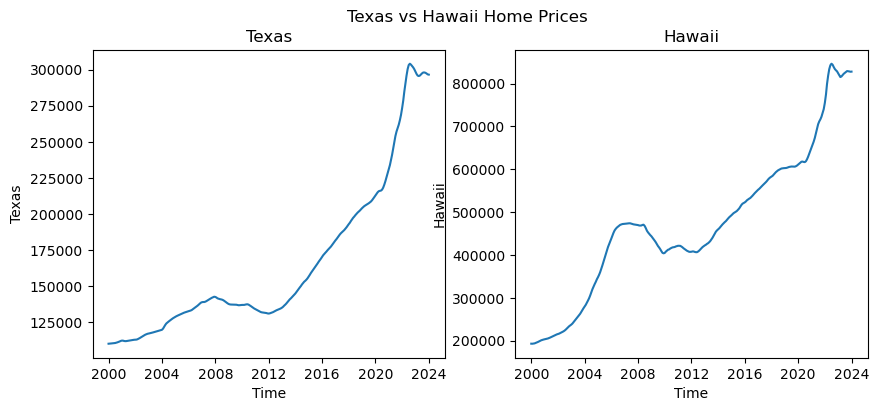

In [26]:
#plot Texas vs Hawaii home prices
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
figure.suptitle('Texas vs Hawaii Home Prices')
axes[0].set_title('Texas')
axes[1].set_title('Hawaii')

sns.lineplot(ax=axes[0], data=df2, x='Time', y='Texas')
sns.lineplot(ax=axes[1], data=df2, x='Time', y='Hawaii')

In [27]:
#calculate pearsonr
stats.pearsonr(df2['Texas'],df2['Hawaii'])

(0.9424383902022513, 1.4291745413638045e-138)

In this case we again have a high correlation coeeficient and an extremely low p-value. 

R-squared: 0.888190


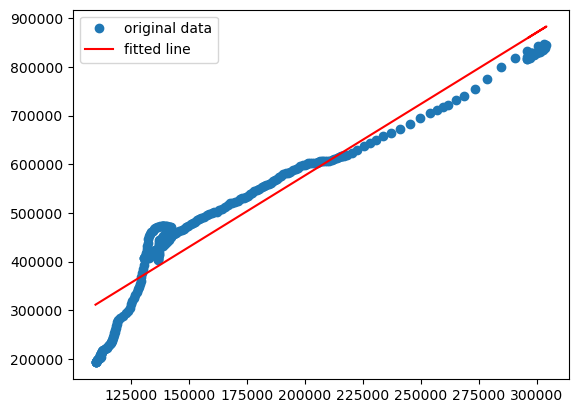

In [28]:
#Calculate linear regression and print R-Squared value
lreg = stats.linregress(df2['Texas'],df2['Hawaii'])
print(f"R-squared: {lreg.rvalue**2:.6f}")

# plot data verus linear regression 
plt.plot(df2['Texas'],df2['Hawaii'], 'o', label='original data')
plt.plot(df2['Texas'], lreg.intercept + lreg.slope*df2['Texas'], 'r', label='fitted line')
plt.legend()
plt.show()

R-squared is significant and the linear regression plot of our data is very convicing. However we know that texas house price does not cause hawaii home price fluctuations. These are two independant values reflecting the same cause which is not each other, but the economy and american policies. 

Reference
GfG. (2023, April 10). Multi-plot grid in Seaborn. GeeksforGeeks. https://www.geeksforgeeks.org/multi-plot-grid-in-seaborn/ 

GregorySmith. (2016, October 26). Video game sales. Kaggle. https://www.kaggle.com/datasets/gregorut/videogamesales 

Mulla, R. (2024, February 21). Zillow Home Value index (updated monthly). Kaggle. 
https://www.kaggle.com/datasets/robikscube/zillow-home-value-index 

Rogel-Salazar, J. (2023). Statistics and data visualisation with python.  CRC Press  

Scipy.stats.linregress#. scipy.stats.linregress - SciPy v1.12.0 Manual. (n.d.). https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress 

Scipy.stats.pearsonr#. scipy.stats.pearsonr - SciPy v1.12.0 Manual. (n.d.). https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr 

